# 13_08 K-means Clustering (군집 모델)

In [1]:
# 필요한 패키지 설치 및 임포트

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 데이터 불러오기
df = pd.read_csv('/Users/adam/Data_Analytics/Python/Datasets/mall_customers/mall_customers.csv')

# 데이터 샘플 확인
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


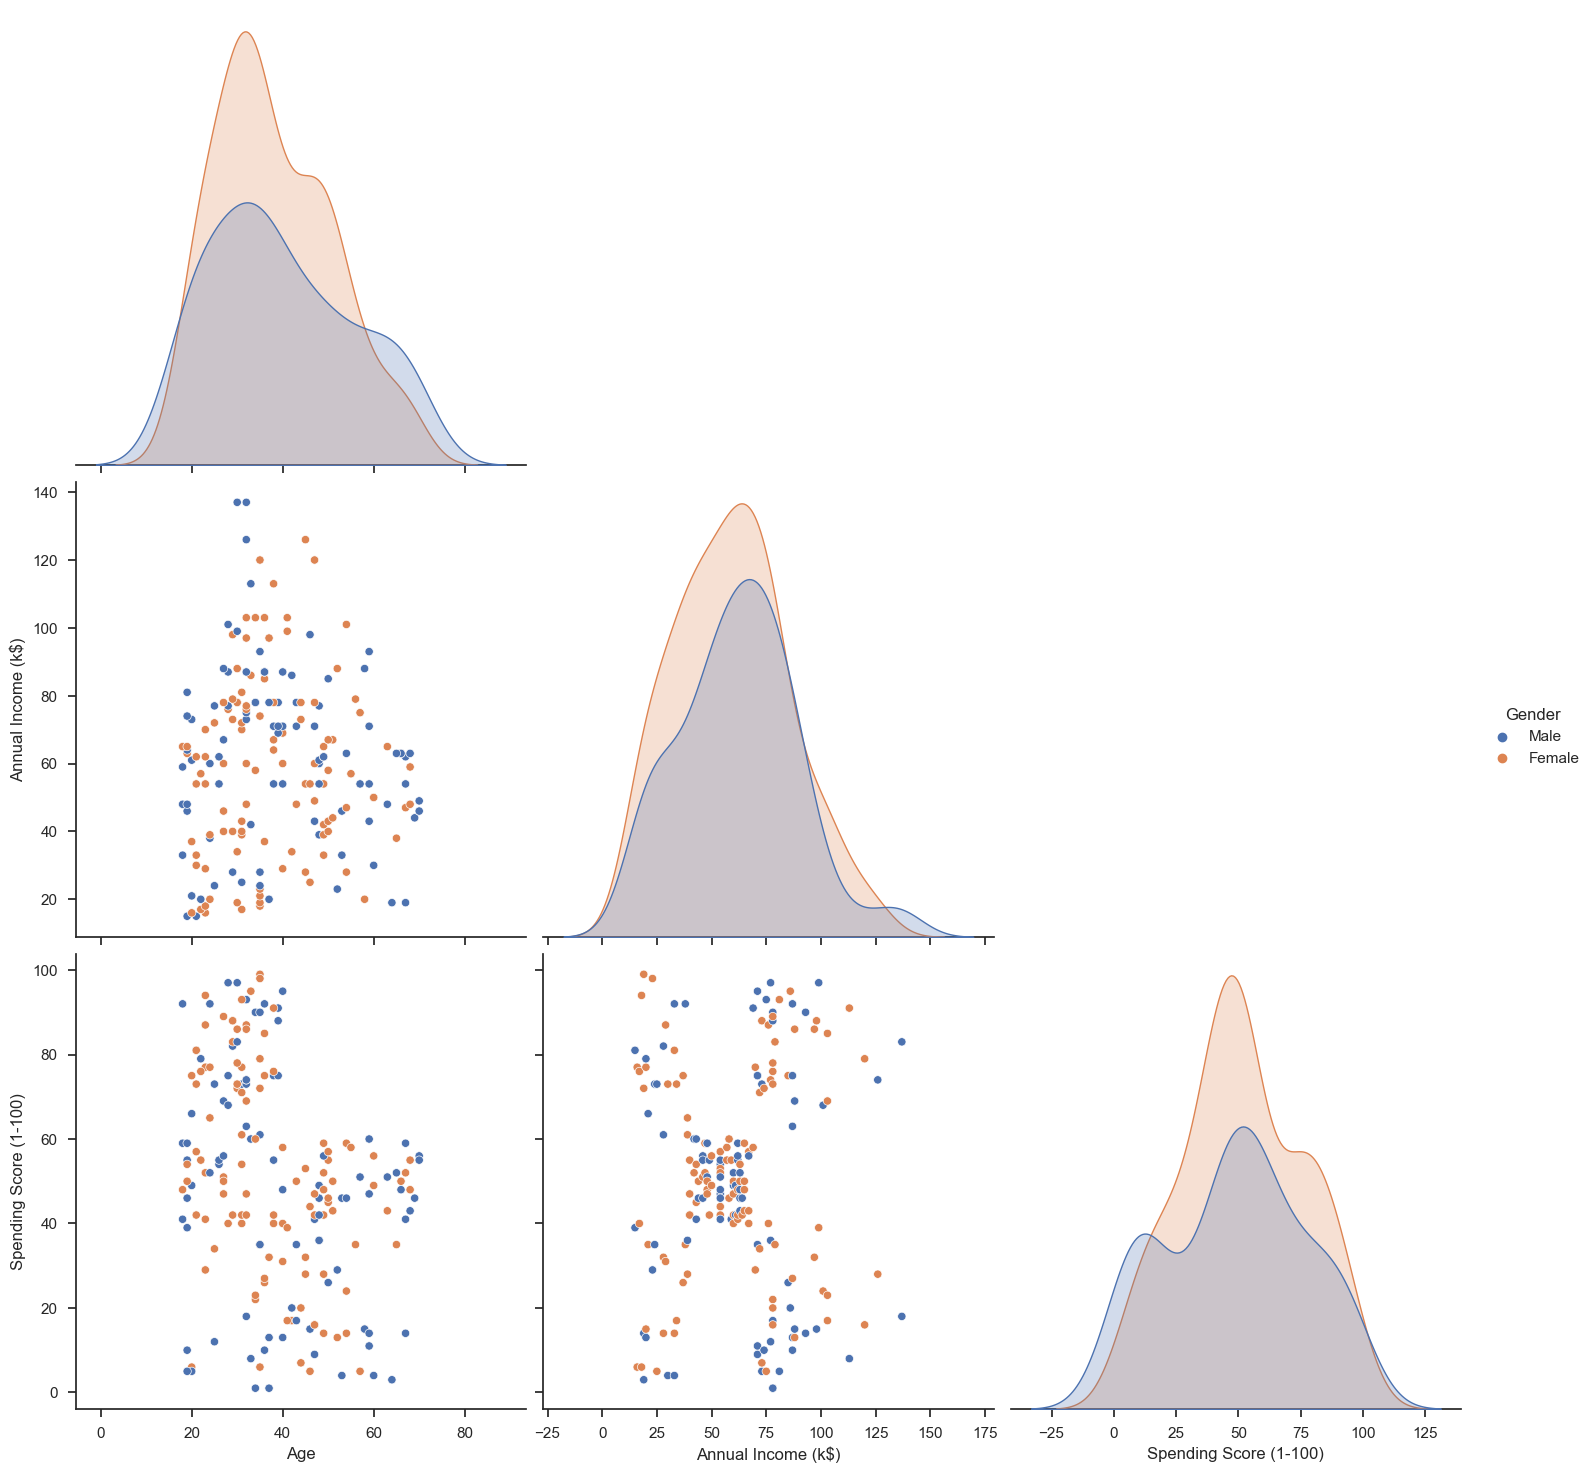

In [3]:
# 산점도 행렬 시각화

# ID 컬럼 제거
df1 = df.drop('CustomerID', axis=1)

sns.set(font_scale=1)
sns.set_style('ticks')
sns.pairplot(df1,
             diag_kind='kde',    # 상관계수가 1이면 분포로 표시
             hue= 'Gender',
             corner=True,
             height = 5
             )
plot_kws = {'s': 100}

plt.show()


In [4]:
# 데이터 스케일 정규화

# Gender 변수 가변수 처리
df2 = pd.get_dummies(df1, columns = ['Gender'], drop_first=True)

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df2)

# 컬럼명 결합
df_minmax = pd.DataFrame(data=df_minmax, columns=df2.columns)

df_minmax.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0


In [5]:
# K-means 클러스터링 모델 생성

kmeans_model_1 = KMeans(init='k-means++',
                        n_clusters=3,
                        n_init=10,
                        max_iter=300,
                        random_state=37
                        )

kmeans_model_1.fit(df_minmax)

# 최저 SSE 값
print('최저 SSE 값:\n', kmeans_model_1.inertia_)

# 각 군집의 중심점 좌표 확인
print('각 군집의 중심점 좌표:\n', kmeans_model_1.cluster_centers_)

# 반복 횟수
print('반복횟수:' ,kmeans_model_1.n_iter_)

최저 SSE 값:
 29.552857611943857
각 군집의 중심점 좌표:
 [[3.86504121e-01 3.62704918e-01 5.15579446e-01 4.44089210e-16]
 [6.04567308e-01 3.88661202e-01 2.87840136e-01 1.00000000e+00]
 [1.97115385e-01 3.85245902e-01 7.21173469e-01 1.00000000e+00]]
반복횟수: 2


<Axes: >

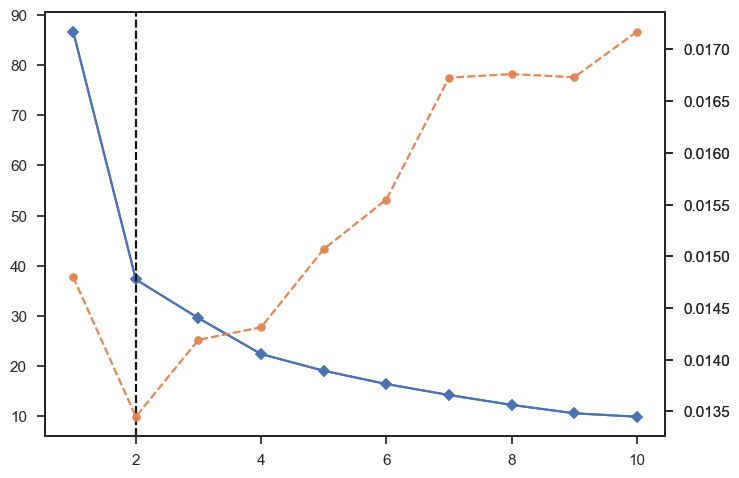

In [6]:
# 엘보우 차트 시각화

Elbow_Chart = KElbowVisualizer(kmeans_model_1, k=(1,11),)
Elbow_Chart.fit(df_minmax)
Elbow_Chart.draw()


/var/folders/7r/wgftjkfx18j59k9jdyw6892c0000gn/T/ipykernel_2358/1825971458.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


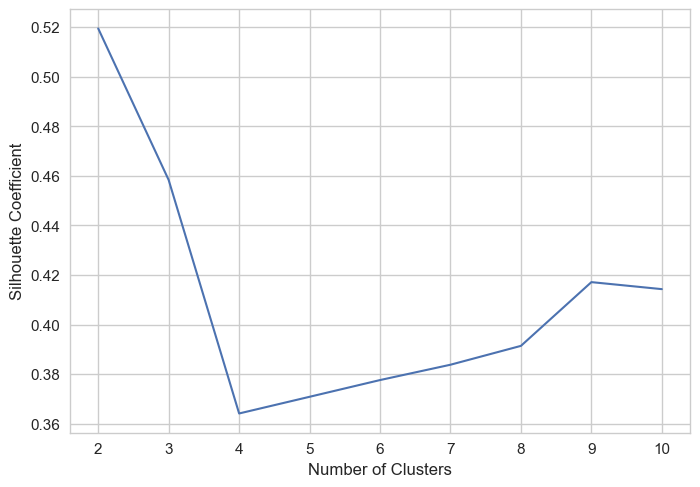

In [7]:
# 실루엣 계수 시각화 1

# k-means 모델 설정
kmeans_model_2 = {'init': 'k-means++',
                  'n_init': 10,
                  'max_iter': 300,
                  'random_state': 37,
                  }

# 각 K의 실루엣 계수 저장
silhouette_coef = []

# 실루엣 계수 그래프 생성
for k in range(2, 11):
    kmeans_silhouette = KMeans(n_clusters=k, **kmeans_model_2)
    kmeans_silhouette.fit(df_minmax)
    score = silhouette_score(df_minmax, kmeans_silhouette.labels_)
    silhouette_coef.append(score)
    
plt.style.use('seaborn-whitegrid')
plt.plot(range(2, 11), silhouette_coef)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

4지점에서 실루엣 계수 급감한다.

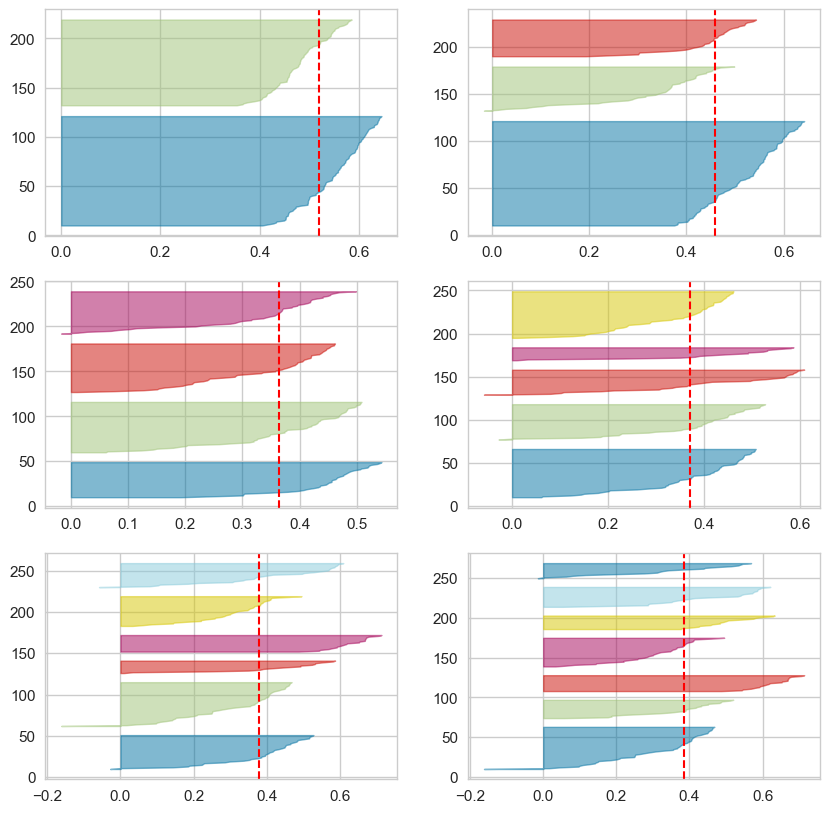

In [8]:
# 실루엣 계수 시각화 2

fig, ax = plt.subplots(3, 2, figsize=(10, 10))
for i in [2, 3, 4, 5, 6, 7]:

    # k-means 클러스터링 모델 생성
    kmeans_model_3 = KMeans(n_clusters=i,
                            init='k-means++',
                            n_init=10,
                            max_iter=300,
                            random_state=37)
    q, mod = divmod(i, 2)
    
    # 실루엣 계수 시각화
    visualizer = SilhouetteVisualizer(kmeans_model_3,
                                      colors='yellowbrick',
                                      ax=ax[q-1][mod])
    visualizer.fit(df_minmax)

4개의 군집에서 관측치가 비교적 균등하게 나뉘며 실루엣 계수의 편차도 고른 편이다. 

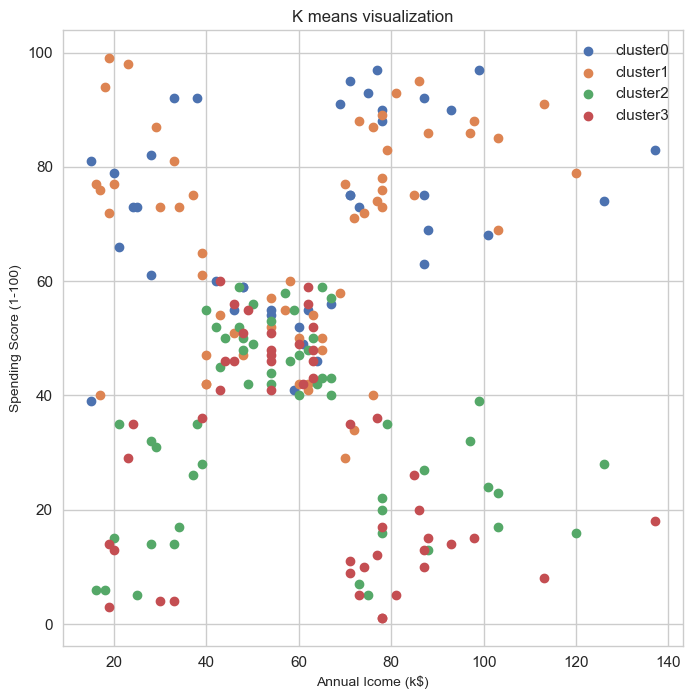

In [9]:
# k-means 클러스터 시각화

# k-means 모델 설정
kmeans_model_4 = KMeans(init='k-means++',
                        n_clusters=4,
                        n_init=10,
                        max_iter=300,
                        random_state=37)

# 군집 번호 결합
df2['cluster1'] = kmeans_model_4.fit_predict(df_minmax)

# 시각화 설정
plt.figure(figsize = (8, 8))
for i in range(0, df2['cluster1'].max() + 1):
    plt.scatter(df2.loc[df2['cluster1'] == i, 'Annual Income (k$)'],
                df2.loc[df2['cluster1'] == i, 'Spending Score (1-100)'],
                label = 'cluster'+str(i))
    
plt.legend()
plt.title('K means visualization', size=12)
plt.xlabel('Annual Icome (k$)', size=10)
plt.ylabel('Spending Score (1-100)', size=10)
plt.show()

0번과 1번 군집은 주로 위쪽에, 2번과 3번 군집은 주로 아래쪽에 분포하고 있다.

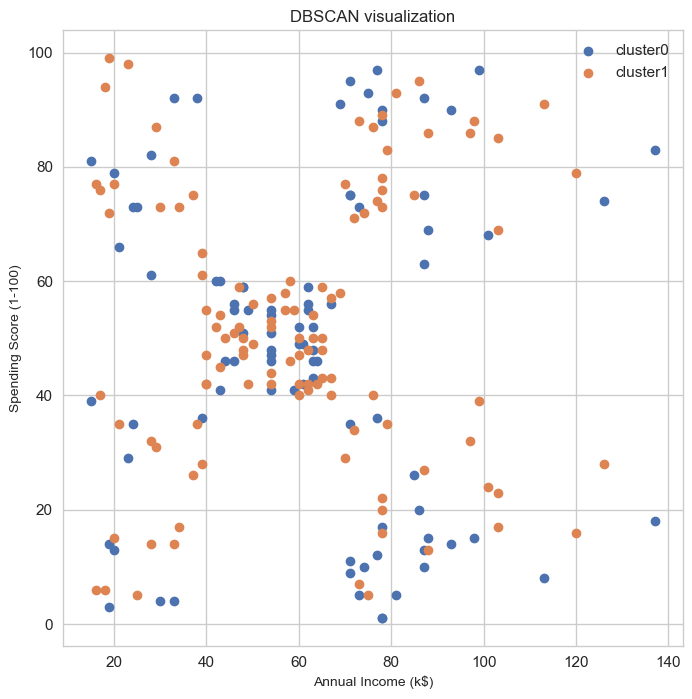

In [10]:
# DBSCAN 모델 생성 및 시각화

# DBSCAN 모델 설정
DBSCAN_model = DBSCAN(eps=0.7, min_samples=5)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
DBSCAN_model.fit(df_minmax)
df2['cluster2'] = DBSCAN_model.fit_predict(df_minmax)

# 시각화 설정
plt.figure(figsize = (8, 8))
for i in range(0, df2['cluster2'].max() + 1):
    plt.scatter(df2.loc[df2['cluster2'] == i, 'Annual Income (k$)'],
                df2.loc[df2['cluster2'] == i, 'Spending Score (1-100)'],
                    label = 'cluster'+str(i))
    
plt.legend()
plt.title('DBSCAN visualization', size=12)
plt.xlabel('Annual Income (k$)', size=10)
plt.ylabel('Spending Score (1-100)', size=10)
plt.show()              

In [11]:
# k-means 군집별 특성 확인


df_kmeans = df2.groupby(['cluster1']).agg({'Age':'mean',
                                           'Annual Income (k$)':'mean',
                                           'Spending Score (1-100)':'mean',
                                           'Gender_Male':'mean'
                                           }).reset_index()

df_kmeans['cnt'] = df2.groupby('cluster1')['Age'].count()
df_kmeans.head()

,cluster1,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cnt
0,0,28.250000,62.000000,71.675000,1.0,40
1,1,28.438596,59.666667,67.684211,0.0,57
2,2,48.109091,58.818182,34.781818,0.0,55
3,3,49.437500,62.416667,29.208333,1.0,48


In [12]:
# DBSCAN  군집별 특성 확인

df_DBSCAN = df2.groupby(['cluster2']).agg({'Age':'mean',
                                           'Annual Income (k$)':'mean',
                                           'Spending Score (1-100)':'mean',
                                           'Gender_Male':'mean'}).reset_index()

df_DBSCAN['cnt'] = df2.groupby('cluster2')['Age'].count()
df_DBSCAN.head()

,cluster2,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cnt
0,0,39.806818,62.227273,48.511364,1.0,88
1,1,38.098214,59.250000,51.526786,0.0,112
